In [1]:
from dotenv import load_dotenv

# API KEY 정보로드
load_dotenv()
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("Summary")

LangSmith 추적을 시작합니다.
[프로젝트명]
Summary


# Stuff

In [3]:
from langchain import hub

prompt = hub.pull("teddynote/summary-stuff-documents-korean")
prompt.pretty_print()from langchain_community.document_loaders import TextLoader

# 뉴스데이터 로드
loader = TextLoader("data/news.txt", encoding="utf-8")
docs = loader.load()
print(f"총 글자수: {len(docs[0].page_content)}")
print("\n========= 앞부분 미리보기 =========\n")
print(docs[0].page_content[:500])

총 글자수: 1708

========= 앞부분 미리보기 =========

제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 


In [4]:
from langchain import hub

prompt = hub.pull("teddynote/summary-stuff-documents-korean")
prompt.pretty_print()

Please summarize the sentence according to the following REQUEST.
REQUEST:
1. Summarize the main points in bullet points in KOREAN.
2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence.
3. Use various emojis to make the summary more interesting.
4. Translate the summary into KOREAN if it is written in ENGLISH.
5. DO NOT translate any technical terms.
6. DO NOT include any unnecessary information.

CONTEXT:
{context}

SUMMARY:"



In [5]:
from langchain_openai import ChatOpenAI
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_teddynote.callbacks import StreamingCallback


llm = ChatOpenAI(
    model_name="gpt-4o-mini",
    streaming=True,
    temperature=0,
    callbacks=[StreamingCallback()],
)


stuff_chain = create_stuff_documents_chain(llm, prompt)
answer = stuff_chain.invoke({"context": docs})

- 🚀 **AI2가 '올모(OLMo)'라는 완전한 오픈 소스 LLM을 출시했다.**  
- 📊 **모델 코드, 가중치, 훈련 데이터 및 도구킷을 모두 공개하여 투명성을 강조했다.**  
- 🛠️ **올모는 70억 매개변수의 '올모 7B'와 10억 매개변수의 '올모 1B' 모델을 포함한 4가지 변형 모델을 제공한다.**  
- 📈 **상업적 활용에 제한이 없으며, 아파치 2.0 라이선스 하에 배포된다.**  
- 🔍 **훈련 데이터에 대한 접근이 가능하여 연구자들이 모델 작동 원리를 이해할 수 있도록 돕는다.**  
- 🌍 **올모는 상업용 제품과 동등한 성능을 보여주지만, 비영어권 언어에 대한 품질이 낮고 코드 생성 기능이 약하다.**  
- 💡 **AI2는 올모를 지속적으로 개선할 계획이며, 오픈 소스 커뮤니티의 중요성을 강조했다.**  
- 📚 **올모의 모든 리소스는 깃허브 및 허깅페이스에서 무료로 제공된다.**  

# Map-Reduce

In [7]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
docs = docs[3:8]  # 여기서 문서의 일부만 요약
print(f"총 페이지수: {len(docs)}")

총 페이지수: 5


In [8]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4o-mini",
)

# map prompt 다운로드
map_prompt = hub.pull("teddynote/map-prompt")

# 프롬프트 출력
map_prompt.pretty_print()

================================ System Message ================================

You are a professional main thesis extractor.

================================ Human Message =================================

Your task is to extract main thesis from given documents. Answer should be in same language as given document. 

#Format: 
- thesis 1
- thesis 2
- thesis 3
- ...

Here is a given document: 
{doc}

Write 1~5 sentences.
#Answer:


In [9]:
# map chain 생성
map_chain = map_prompt | llm | StrOutputParser()

In [10]:
# 문서에 대한 주요내용 추출
doc_summaries = map_chain.batch(docs)

In [11]:
# 요약된 문서의 수 출력
len(doc_summaries)

5

In [12]:
# 일부 문서의 요약 출력
print(doc_summaries[0])

- 미국 바이든 대통령이 안전하고 신뢰할 수 있는 AI 개발과 사용을 보장하기 위한 행정명령을 발표하였다.
- 이 행정명령은 AI의 안전과 보안 기준 마련, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제협력을 포함한다.
- AI 시스템 개발 기업은 안전 테스트 결과와 시스템 정보를 미국 정부와 공유해야 하며, AI의 책임 있는 사용을 위한 모범사례와 지침이 마련될 예정이다.
- 또한, 중소기업과 개발자에게 기술과 인프라를 지원하고, 외국인 전문가들이 미국에서 공부하고 취업할 수 있도록 비자 기준을 현대화할 계획이다.


In [13]:
# reduce prompt 다운로드
reduce_prompt = hub.pull("teddynote/reduce-prompt")

# 프롬프트 출력
reduce_prompt.pretty_print()

================================ System Message ================================

You are a professional summarizer. You are given a list of summaries of documents and you are asked to create a single summary of the documents.

================================ Human Message =================================

#Instructions: 
1. Extract main points from a list of summaries of documents
2. Make final summaries in bullet points format.
3. Answer should be written in {language}.

#Format: 
- summary 1
- summary 2
- summary 3
- ...

Here is a list of summaries of documents: 
{doc_summaries}

#SUMMARY:


In [14]:
# reduce chain 생성
reduce_chain = reduce_prompt | llm | StrOutputParser()

In [15]:
from langchain_teddynote.messages import stream_response

answer = reduce_chain.stream({"doc_summaries": doc_summaries, "language": "Korean"})
stream_response(answer)

- 미국 바이든 대통령이 AI 개발과 사용의 안전성을 보장하기 위한 행정명령을 발표하였으며, AI 시스템 개발 기업은 안전 테스트 결과를 정부와 공유해야 한다.
- G7은 '히로시마 AI 프로세스'를 통해 AI 기업을 위한 국제 행동강령에 합의하고, AI의 위험 평가 및 투명성을 강조하였다.
- 영국 AI 안전성 정상회의에서 블레츨리 선언이 발표되었으며, AI 시스템의 안전성을 보장하기 위한 협력의 중요성이 강조되었다.
- 미국 북부지방법원은 생성 AI 기업에 대한 저작권 침해 소송을 기각하였고, 원고에게 고소장 수정을 요청하였다.
- 미국 연방거래위원회(FTC)는 생성 AI의 소비자 및 창작자에 대한 피해 가능성을 경고하며, 빅테크의 시장 지배력 강화 우려를 표명하였다.

In [16]:
from langchain_core.runnables import chain


@chain
def map_reduce_chain(docs):
    map_llm = ChatOpenAI(
        temperature=0,
        model_name="gpt-4o-mini",
    )

    # map prompt 다운로드
    map_prompt = hub.pull("teddynote/map-prompt")

    # map chain 생성
    map_chain = map_prompt | map_llm | StrOutputParser()

    # 첫 번째 프롬프트, ChatOpenAI, 문자열 출력 파서를 연결하여 체인을 생성합니다.
    doc_summaries = map_chain.batch(docs)

    # reduce prompt 다운로드
    reduce_prompt = hub.pull("teddynote/reduce-prompt")
    reduce_llm = ChatOpenAI(
        model_name="gpt-4o",
        temperature=0,
        callbacks=[StreamingCallback()],
        streaming=True,
    )

    reduce_chain = reduce_prompt | reduce_llm | StrOutputParser()

    return reduce_chain.invoke({"doc_summaries": doc_summaries, "language": "Korean"})

In [17]:
# 결과 출력
answer = map_reduce_chain.invoke(docs)

- 미국 바이든 대통령은 AI의 안전하고 신뢰할 수 있는 개발과 사용을 보장하기 위한 행정명령을 발표하였으며, AI의 안전성, 개인정보 보호, 형평성, 소비자 보호, 혁신 촉진 등을 포함한다.
- G7은 '히로시마 AI 프로세스'를 통해 AI 기업을 위한 국제 행동강령에 합의하였으며, AI 수명주기 전반에 걸친 위험 평가, 투명성, 책임성 보장 등을 요구한다.
- 28개국은 영국 블레츨리 파크에서 AI 안전성 정상회의를 열고 AI 안전 보장을 위한 블레츨리 선언을 발표하였으며, AI 안전 연구소 출범과 안전 테스트 계획을 수립할 것이라고 밝혔다.
- 미국 캘리포니아 북부지방법원은 예술가들이 제기한 생성 AI 기업에 대한 저작권 침해 소송을 기각하였으며, 특정 작품의 저작권 침해 소송은 계속 진행 중이다.
- 미국 연방거래위원회(FTC)는 생성 AI로 인한 소비자와 창작자의 피해 가능성 및 빅테크의 시장 지배력 강화 우려를 표명하며, AI 관련 불법 행위에 대처하고 공정한 경쟁 시장을 유지하겠다고 강조했다.

# Map-Refine

In [18]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# map llm 생성
map_llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4o-mini",
)

# map chain 생성
map_summary = hub.pull("teddynote/map-summary-prompt")

# 프롬프트 출력
map_summary.pretty_print()

================================ System Message ================================

You are an expert summarizer. Your task is to summarize the following document in {language}.

================================ Human Message =================================

Extract most important main thesis from the documents, then summarize in bullet points.

#Format:
- summary 1
- summary 2
- summary 3
-...

Here is a given document: 
{documents}

Write 1~5 sentences. Think step by step.
#Summary:


In [19]:
# map chain 생성
map_chain = map_summary | llm | StrOutputParser()

In [20]:
# 첫 번째 문서의 요약 출력
print(map_chain.invoke({"documents": docs[0], "language": "Korean"}))

- 미국 바이든 대통령이 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령을 발표했다.
- 이 행정명령은 AI의 안전과 보안 기준, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제 협력을 포함한다.
- AI 시스템 개발 기업은 안전 테스트 결과와 시스템 정보를 정부와 공유해야 하며, AI의 책임 있는 사용을 위한 법적 지침이 마련된다.
- 소비자 보호와 근로자 지원을 위해 의료 분야에서의 AI 사용 촉진 및 교육 도구 개발이 강조된다.
- 국가 AI 연구 자원을 통해 AI 연구를 촉진하고, 외국인 전문가의 미국 내 학습과 취업을 지원하는 방안도 포함된다.


In [21]:
# 모든 문서를 입력으로 정의합니다.
input_doc = [{"documents": doc, "language": "Korean"} for doc in docs]

In [22]:
# 모든 문서에 대한 요약본을 출력합니다.
print(map_chain.batch(input_doc))

['- 미국 바이든 대통령이 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령을 발표했다.\n- 이 행정명령은 AI의 안전과 보안 기준, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제 협력을 포함한다.\n- AI 시스템 개발 기업은 안전 테스트 결과와 시스템 정보를 정부와 공유해야 하며, AI의 책임 있는 사용을 위한 법적 지침이 마련된다.\n- 소비자 보호와 근로자 지원을 위해 의료 분야에서의 AI 사용 촉진과 교육 도구 개발이 강조된다.\n- 국가 AI 연구 자원을 통해 AI 연구를 촉진하고, 외국인 전문가의 미국 내 학습과 취업을 지원하는 방안도 포함된다.', "- G7은 2023년 10월 30일 '히로시마 AI 프로세스'를 통해 AI 기업을 위한 국제 행동강령에 합의하였다.\n- 이 행동강령은 AI 시스템의 위험 식별 및 완화를 위한 자발적인 채택을 권장하며, AI 수명주기 전반에 걸친 위험 평가와 투명성, 책임성을 강조한다.\n- G7은 AI 시스템의 성능과 한계를 공개하고, 정보 공유 및 협력을 통해 위험 관리 정책을 마련할 것을 요구하고 있다.\n- 또한, AI 생성 콘텐츠의 인증 및 출처 확인을 위한 기술적 메커니즘 개발과 사회적 위험 완화를 위한 연구에 우선 투자할 것을 제안하고 있다.\n- 마지막으로, 국제 기술 표준의 개발과 개인정보 보호를 위한 적절한 보호 장치 구현을 가속화할 계획이다.", '- 28개국이 영국 블레츨리 파크에서 열린 AI 안전성 정상회의에서 AI 안전 보장을 위한 블레츨리 선언을 발표했다.\n- 선언은 AI 시스템의 안전성을 보장하기 위해 모든 이해관계자의 협력이 필요하다고 강조하며, 특히 AI 개발 기업의 책임을 지적했다.\n- 영국 총리는 AI 안전 연구소의 출범과 함께 첨단 AI 모델에 대한 안전성 시험 계획을 발표하고, 각국 정부는 테스트 결과를 공유하고 공동 표준 개발에 노력하기로 합의했다.\n- 참가국들은 AI의 위험과 가능성에 대한 과학적 평가를 위한 

In [23]:
# refine prompt 다운로드
refine_prompt = hub.pull("teddynote/refine-prompt")

# 프롬프트 출력
refine_prompt.pretty_print()

================================ System Message ================================

You are an expert summarizer.

================================ Human Message =================================

Your job is to produce a final summary

We have provided an existing summary up to a certain point:
{previous_summary}

We have the opportunity to refine the existing summary(only if needed) with some more context below.
------------
{current_summary}
------------
Given the new context, refine the original summary in {language}.
If the context isn't useful, return the original summary.


In [24]:
# refine llm 생성
refine_llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-4o-mini",
)

# refine chain 생성
refine_chain = refine_prompt | refine_llm | StrOutputParser()

In [25]:
from langchain_core.runnables import chain


@chain
def map_refine_chain(docs):

    # map chain 생성
    map_summary = hub.pull("teddynote/map-summary-prompt")

    map_chain = (
        map_summary
        | ChatOpenAI(
            model_name="gpt-4o-mini",
            temperature=0,
        )
        | StrOutputParser()
    )

    input_doc = [{"documents": doc.page_content, "language": "Korean"} for doc in docs]

    # 첫 번째 프롬프트, ChatOpenAI, 문자열 출력 파서를 연결하여 체인을 생성합니다.
    doc_summaries = map_chain.batch(input_doc)

    refine_prompt = hub.pull("teddynote/refine-prompt")

    refine_llm = ChatOpenAI(
        model_name="gpt-4o-mini",
        temperature=0,
        callbacks=[StreamingCallback()],
        streaming=True,
    )

    refine_chain = refine_prompt | refine_llm | StrOutputParser()

    previous_summary = doc_summaries[0]

    for current_summary in doc_summaries[1:]:

        previous_summary = refine_chain.invoke(
            {
                "previous_summary": previous_summary,
                "current_summary": current_summary,
                "language": "Korean",
            }
        )
        print("\n\n-----------------\n\n")

    return previous_summary

In [26]:
refined_summary = map_refine_chain.invoke(docs)

- 미국 바이든 대통령이 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령을 발표하였다.
- 행정명령은 AI의 안전과 보안 기준, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제 협력을 포함한다.
- AI 시스템 개발 기업은 안전 테스트 결과와 시스템 정보를 정부와 공유해야 하며, AI의 책임 있는 사용을 위한 모범사례와 지침이 마련된다.
- 소비자 보호와 근로자 지원을 위해 의료 분야에서의 AI 사용 촉진 및 교육 도구 개발이 강조된다.
- 국가 AI 연구자원(NAIRR)을 통해 AI 연구를 촉진하고, 외국인 전문가의 미국 내 학습과 취업을 지원하는 방안도 포함된다.
- 또한, G7은 '히로시마 AI 프로세스'를 통해 AI 기업을 위한 국제 행동강령에 합의하였으며, 이는 AI 시스템의 위험 식별과 완화를 위한 자발적인 채택을 권장하고, AI 수명주기 전반에 걸친 위험 평가와 투명성, 책임성을 강조한다.
- G7은 AI 시스템의 성능과 한계를 공개하고, 정보 공유 및 협력을 통해 AI 거버넌스와 위험 관리 정책을 마련할 것을 요구하며, AI 생성 콘텐츠의 인증과 출처 확인을 위한 기술적 메커니즘 개발을 포함하여 사회적 위험 완화와 글로벌 문제 해결을 위한 AI 시스템 개발을 우선시한다.
- 마지막으로, 국제 기술 표준의 개발과 개인정보 보호를 위한 적절한 보호 장치 구현을 가속화할 계획이다.

-----------------


- 미국 바이든 대통령이 안전하고 신뢰할 수 있는 AI 개발과 사용을 위한 행정명령을 발표하였다.
- 행정명령은 AI의 안전과 보안 기준, 개인정보 보호, 형평성과 시민권 향상, 소비자 보호, 노동자 지원, 혁신과 경쟁 촉진, 국제 협력을 포함한다.
- AI 시스템 개발 기업은 안전 테스트 결과와 시스템 정보를 정부와 공유해야 하며, AI의 책임 있는 사용을 위한 모범사례와 지침이 마련된다.
- 소비자 보호와 근로자 지원을 위해 의료 분야에서의 AI 사용 촉진 및 교육 도구 개발이 

# Chain of Density

In [27]:
import textwrap
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import SimpleJsonOutputParser

# {content}를 제외한 모든 입력에 대한 기본값 지정
cod_chain_inputs = {
    "content": lambda d: d.get("content"),
    "content_category": lambda d: d.get("content_category", "Article"),
    "entity_range": lambda d: d.get("entity_range", "1-3"),
    "max_words": lambda d: int(d.get("max_words", 80)),
    "iterations": lambda d: int(d.get("iterations", 5)),
}

# Chain of Density 프롬프트 다운로드
cod_prompt = hub.pull("teddynote/chain-of-density-prompt")

# Chain of Density 체인 생성
cod_chain = (
    cod_chain_inputs
    | cod_prompt
    | ChatOpenAI(temperature=0, model="gpt-4o-mini")
    | SimpleJsonOutputParser()
)

# 두 번째 체인 생성, 최종 요약만 추출 (스트리밍 불가능, 최종 결과가 필요함)
cod_final_summary_chain = cod_chain | (
    lambda output: output[-1].get(
        "denser_summary", '오류: 마지막 딕셔너리에 "denser_summary" 키가 없습니다'
    )
)

In [28]:
content = docs[1].page_content
print(content)

SPRi AI Brief |  
2023-12 월호
2G7, 히로시마 AI 프로세스를 통해 AI 기업 대상 국제 행동강령에 합의
nG7이 첨단 AI 시스템을 개발하는 기업을 대상으로 AI 위험 식별과 완화를 위해 자발적인 
채택을 권고하는 AI 국제 행동강령을 마련
n행동강령은 AI 수명주기 전반에 걸친 위험 평가와 완화, 투명성과 책임성의 보장, 정보공유와 
이해관계자 간 협력, 보안 통제, 콘텐츠 인증과 출처 확인 등의 조치를 요구KEY Contents
£G7, 첨단 AI 시스템의 위험 관리를 위한 국제 행동강령 마련
n주요 7개국(G7)* 은 2023 년 10월 30일 ‘히로시마 AI 프로세스 ’를 통해 AI 기업 대상의 AI 국제 
행동강령 (International Code of Conduct for Advanced AI Systems) 에 합의
∙G7은 2023 년 5월 일본 히로시마에서 개최된 정상회의에서 생성 AI에 관한 국제규범 마련과 
정보공유를 위해 ‘히로시마 AI 프로세스 ’를 출범**
∙기업의 자발적 채택을 위해 마련된 이번 행동강령은 기반모델과 생성 AI를 포함한 첨단 AI 시스템의 
위험 식별과 완화에 필요한 조치를 포함
* 주요 7개국(G7)은 미국, 일본, 독일, 영국, 프랑스 , 이탈리아 , 캐나다를 의미
** 5월 정상회의에는 한국, 호주, 베트남 등을 포함한 8개국이 초청을 받았으나 , AI 국제 행동강령에는 우선 G7 국가만 포함하여 채택
nG7은 행동강령을 통해 아래의 조치를 제시했으며 , 빠르게 발전하는 기술에 대응할 수 있도록 
이해관계자 협의를 통해 필요에 따라 개정할 예정
∙첨단 AI 시스템의 개발 과정에서 AI 수명주기 전반에 걸쳐 위험을 평가 및 완화하는 조치를 채택하고 , 
첨단 AI 시스템의 출시와 배포 이후 취약점과 오용 사고, 오용 유형을 파악해 완화
∙첨단 AI 시스템의 성능과 한계를 공개하고 적절하거나 부적절한 사용영역을 알리는 방법으로 투명성을 
보장하고 책임성을 강화
∙산업계 , 정부, 시민사회 

In [29]:
# 결과를 저장할 빈 리스트 초기화
results: list[dict[str, str]] = []

# cod_chain을 스트리밍 모드로 실행하고 부분적인 JSON 결과를 처리
for partial_json in cod_chain.stream(
    {"content": content, "content_category": "Article"}
):
    # 각 반복마다 results를 업데이트
    results = partial_json

    # 현재 결과를 같은 줄에 출력 (캐리지 리턴을 사용하여 이전 출력을 덮어씀)
    print(results, end="\r", flush=True)

# 총 요약 수 계산
total_summaries = len(results)
print("\n")

# 각 요약을 순회하며 처리
i = 1
for cod in results:
    # 누락된 엔티티들을 추출하고 포맷팅
    added_entities = ", ".join(
        [
            ent.strip()
            for ent in cod.get(
                "missing_entities", 'ERR: "missing_entiies" key not found'
            ).split(";")
        ]
    )
    # 더 밀도 있는 요약 추출
    summary = cod.get("denser_summary", 'ERR: missing key "denser_summary"')

    # 요약 정보 출력 (번호, 총 개수, 추가된 엔티티)
    print(
        f"### CoD Summary {i}/{total_summaries}, 추가된 엔티티(entity): {added_entities}"
        + "\n"
    )
    # 요약 내용을 80자 너비로 줄바꿈하여 출력
    print(textwrap.fill(summary, width=80) + "\n")
    i += 1

print("\n============== [최종 요약] =================\n")
print(summary)

[{'missing_entities': 'G7;히로시마 AI 프로세스;AI 국제 행동강령', 'denser_summary': 'G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했다. 이 행동강령은 AI 위험 식별과 완화를 위한 자발적 채택을 권장하며, AI 수명주기 전반의 위험 평가, 투명성, 책임성, 정보 공유 및 보안 통제를 요구한다.'}, {'missing_entities': '위험 평가;정보 공유;보안 통제', 'denser_summary': 'G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했다. 이 행동강령은 AI 위험 식별과 완화를 위한 자발적 채택을 권장하며, 위험 평가, 정보 공유, 보안 통제를 포함한 조치를 요구한다.'}, {'missing_entities': 'AI 수명주기;투명성;책임성', 'denser_summary': 'G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했다. 이 행동강령은 AI 위험 식별과 완화를 위한 자발적 채택을 권장하며, AI 수명주기 전반의 위험 평가, 투명성, 책임성을 포함한 조치를 요구한다.'}, {'missing_entities': 'AI 거버넌스;위험 관리 정책;신뢰할 수 있는 콘텐츠', 'denser_summary': 'G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했다. 이 행동강령은 AI 위험 식별과 완화를 위한 자발적 채택을 권장하며, AI 수명주기 전반의 위험 평가, 투명성, AI 거버넌스 및 신뢰할 수 있는 콘텐츠 인증을 포함한 조치를 요구한다.'}, {'missing_entities': '사회적 위험;기후 위기;세계적 난제', 'denser_summary': 'G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했

In [30]:
print(summary)

G7은 2023년 10월 30일 히로시마 AI 프로세스를 통해 AI 기업을 위한 AI 국제 행동강령에 합의했다. 이 행동강령은 AI 위험 식별과 완화를 위한 자발적 채택을 권장하며, AI 수명주기 전반의 위험 평가, 투명성, 사회적 위험 완화 및 기후 위기 대응을 포함한 조치를 요구한다.


# Clustering-Map-Refine

In [31]:
from langchain_community.document_loaders import PyMuPDFLoader

loader = PyMuPDFLoader("data/SPRI_AI_Brief_2023년12월호_F.pdf")
docs = loader.load()
len(docs)

23

In [32]:
# 하나의 Text 로 모든 문서를 연결합니다.
texts = "\n\n".join([doc.page_content for doc in docs])
len(texts)

27977

In [33]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
split_docs = text_splitter.split_text(texts)

In [34]:
# 총 문서의 수 확인
len(split_docs)

79

In [35]:
from langchain_upstage import UpstageEmbeddings

embeddings = UpstageEmbeddings(model="solar-embedding-1-large-passage")

vectors = embeddings.embed_documents(split_docs)

In [36]:
from sklearn.cluster import KMeans

# 클러스터 수를 선택하면 문서의 콘텐츠에 따라 조정할 수 있습니다.
num_clusters = 10

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=123).fit(vectors)

In [37]:
# 결과 확인
kmeans.labels_

array([5, 3, 7, 6, 4, 4, 4, 5, 3, 8, 8, 8, 1, 1, 8, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 8, 8, 8, 8, 2, 2, 2, 2, 9, 9, 9, 3,
       9, 9, 9, 6, 6, 6, 6, 5, 5, 5, 5, 0, 0, 0, 0, 4, 4, 4, 8, 8, 8, 8,
       4, 8, 4, 9, 4, 4, 9, 6, 2, 5, 4, 4, 4])

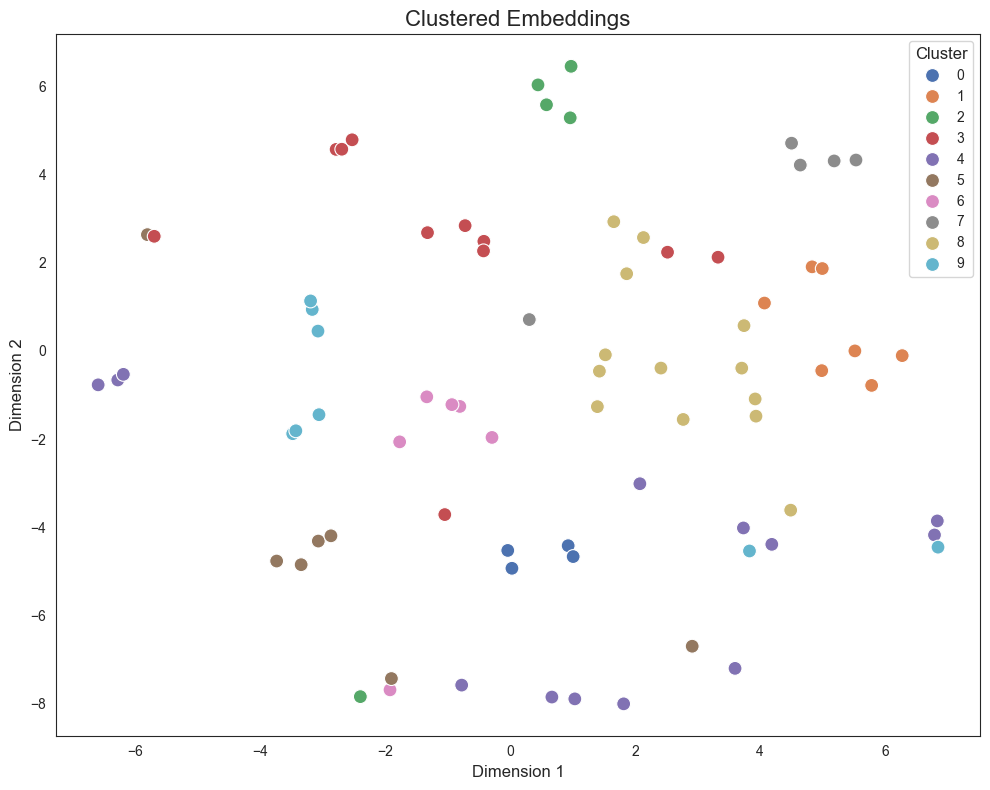

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 경고 제거
import warnings

warnings.filterwarnings("ignore")

# t-SNE 수행 및 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(np.array(vectors))

# seaborn 스타일 설정
sns.set_style("white")

# 축소된 데이터 플롯
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_data_tsne[:, 0],
    y=reduced_data_tsne[:, 1],
    hue=kmeans.labels_,
    palette="deep",
    s=100,
)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.title("Clustered Embeddings", fontsize=16)
plt.legend(title="Cluster", title_fontsize=12)

# 배경색 설정
plt.gcf().patch.set_facecolor("white")

plt.tight_layout()
plt.show()

In [40]:
import numpy as np

# 가장 가까운 점들을 저장할 빈 리스트 생성
closest_indices = []

# 클러스터 수만큼 반복
for i in range(num_clusters):

    # 해당 클러스터 중심으로부터의 거리 목록 구하기
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)

    # 가장 가까운 점의 인덱스 찾기 (argmin을 사용하여 최소 거리 찾기)
    closest_index = np.argmin(distances)

    # 해당 인덱스를 가장 가까운 인덱스 리스트에 추가
    closest_indices.append(closest_index)

In [41]:
# 문서의 요약을 순서대로 진행하기 위하여 오름차순 정렬
selected_indices = sorted(closest_indices)
selected_indices

[4, 16, 24, 28, 34, 37, 41, 47, 51, 55]

In [42]:
from langchain_core.documents import Document

selected_docs = [Document(page_content=split_docs[doc]) for doc in selected_indices]
selected_docs

[Document(metadata={}, page_content='▹ 빌 게이츠, AI 에이전트로 인한 컴퓨터 사용의 패러다임 변화 전망································ 13\n   ▹ 유튜브, 2024년부터 AI 생성 콘텐츠 표시 의무화···························································· 14\n 3. 기술/연구\n   ▹ 영국 과학혁신기술부, AI 안전 연구소 설립 발표······························································ 15\n   ▹ 구글 딥마인드, 범용 AI 모델의 기능과 동작에 대한 분류 체계 발표······························ 16\n   ▹ 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수 ··········································· 17\n   \n 4. 인력/교육'),
 Document(metadata={}, page_content='1. 정책/법제  \n2. 기업/산업 \n3. 기술/연구 \n 4. 인력/교육\n영국 AI 안전성 정상회의에 참가한 28개국, AI 위험에 공동 대응 선언\nn 영국 블레츨리 파크에서 개최된 AI 안전성 정상회의에 참가한 28개국들이 AI 안전 보장을 \n위한 협력 방안을 담은 블레츨리 선언을 발표\nn 첨단 AI를 개발하는 국가와 기업들은 AI 시스템에 대한 안전 테스트 계획에 합의했으며, \n영국의 AI 안전 연구소가 전 세계 국가와 협력해 테스트를 주도할 예정 \nKEY Contents\n£ AI 안전성 정상회의 참가국들, 블레츨리 선언 통해 AI 안전 보장을 위한 협력에 합의\nn 2023년 11월 1~2일 영국 블레츨리 파크에서 열린 AI 안전성 정상회의(AI Safety Summit)에 \n참가한 28개국 대표들이 AI 위험 관리를 위한 ‘블레츨리 선언’을 발표 \n∙선언은 AI 안전 보장을 위해 

In [43]:
# 이전에 생성한 map_refine_chain을 사용하여 요약 생성
refined_summary = map_refine_chain.invoke(selected_docs)

- 빌 게이츠는 AI 에이전트가 컴퓨터 사용의 패러다임을 변화시킬 것이라고 전망했다.
- 유튜브는 2024년부터 AI 생성 콘텐츠에 대한 표시를 의무화할 예정이다.
- 영국 과학혁신기술부는 AI 안전 연구소를 설립한다고 발표했다.
- 28개국이 참가한 영국 AI 안전성 정상회의에서 AI 위험에 대한 공동 대응을 위한 블레츨리 선언이 발표되었다. 이 선언은 AI 안전 보장을 위해 모든 이해관계자의 협력을 강조하고 있다.
- 첨단 AI 개발 국가와 기업들은 AI 시스템에 대한 안전 테스트 계획에 합의하였으며, 영국의 AI 안전 연구소가 이를 주도할 예정이다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작에 대한 새로운 분류 체계를 발표했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.

-----------------


- 빌 게이츠는 AI 에이전트가 컴퓨터 사용의 패러다임을 변화시킬 것이라고 전망했다.
- 유튜브는 2024년부터 AI 생성 콘텐츠에 대한 표시를 의무화할 예정이다.
- 영국 과학혁신기술부는 AI 안전 연구소를 설립한다고 발표했다.
- 28개국이 참가한 영국 AI 안전성 정상회의에서 AI 위험에 대한 공동 대응을 위한 블레츨리 선언이 발표되었다. 이 선언은 AI 안전 보장을 위해 모든 이해관계자의 협력을 강조하고 있다.
- 첨단 AI 개발 국가와 기업들은 AI 시스템에 대한 안전 테스트 계획에 합의하였으며, 영국의 AI 안전 연구소가 이를 주도할 예정이다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작에 대한 새로운 분류 체계를 발표했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.
- 미국 연방거래위원회(FTC)는 저작권청에 AI와 관련된 소비자 보호 및 경쟁 측면의 의견서를 제출하며, 생성 AI로 인해 창작자와 소비자에게 피해가 발생할 가능성에 대해 우려를 표명했다. 
- FTC는 일부 대형 기술 기업들이 막대한 자원을 통해 시장 지배력을 강화할 수 있다는 점에 

In [44]:
# 최종 결과 출력
print(refined_summary)

- 빌 게이츠는 5년 내에 일상 언어로 모든 작업을 처리할 수 있는 AI 에이전트가 보급될 것이라고 전망하며, 이러한 AI 에이전트가 컴퓨터 사용 방식을 완전히 변화시키고 소프트웨어 산업에도 큰 영향을 미칠 것으로 예상하고 있다. AI 에이전트의 도입은 의료, 교육, 생산성, 엔터테인먼트 및 쇼핑 등 다양한 산업 분야에서 고가의 서비스를 대중화할 것으로 보인다.
- 유튜브는 2024년부터 AI 생성 콘텐츠에 대한 표시를 의무화할 예정이다.
- 영국 과학혁신기술부는 AI 안전 연구소를 설립한다고 발표했다.
- 28개국이 참가한 영국 AI 안전성 정상회의에서 AI 위험에 대한 공동 대응을 위한 블레츨리 선언이 발표되었으며, 이 선언은 AI 안전 보장을 위해 모든 이해관계자의 협력을 강조하고 있다.
- 첨단 AI 개발 국가와 기업들은 AI 시스템에 대한 안전 테스트 계획에 합의하였으며, 영국의 AI 안전 연구소가 이를 주도할 예정이다.
- 구글 딥마인드는 범용 AI 모델의 기능과 동작에 대한 새로운 분류 체계를 발표했다.
- 갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수한 성능을 보였다.
- 미국 연방거래위원회(FTC)는 저작권청에 AI와 관련된 소비자 보호 및 경쟁 측면의 의견서를 제출하며, 생성 AI로 인해 창작자와 소비자에게 피해가 발생할 가능성에 대해 우려를 표명했다. FTC는 일부 대형 기술 기업들이 막대한 자원을 통해 시장 지배력을 강화할 수 있다는 점에 대한 우려도 제기했다.
- 저작권청은 생성 AI와 관련된 저작권법 및 정책 이슈를 조사하고 있으며, 폭넓은 의견 수렴을 진행하고 있다.
- EU AI 법 최종협상에서 프랑스, 이탈리아, 독일이 기반모델 규제에 반대하며 협상이 어려움을 겪고 있다. 이들 국가는 기반모델 개발기업에 자율적 행동강령을 도입하고 이를 의무화하는 방안을 제안하였다.
- 10월 24일 회의에서는 강력한 AI 모델에 대해 더 엄격한 규칙을 적용하는 계층적 접근방식에 대한 기본 합의가 이루어졌다.
- 프런티어 모델 포럼은